Exploraty Data Analysis

In [1]:
#importing libraries
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast

# loding data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

c:\Users\Mveun\anaconda3\envs\DATA_PROJECT\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [3]:
df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
94363,Software Engineer,Integration Engineer,"Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via Joboko,Full-time,False,Vietnam,2023-03-31 00:17:15,False,False,Vietnam,None,NaN,NaN,"NEYU Ltd.,",None,None
658900,Senior Data Engineer,Senior Data Engineer,United States,via Jooble,Full-time,False,Georgia,2023-01-07 10:30:59,False,False,United States,None,NaN,NaN,"Perficient, Inc.","['scala', 'java', 'python', 'databricks', 'spa...","{'cloud': ['databricks'], 'libraries': ['spark..."
172613,Data Scientist,Feasibility Data Scientist,West Bengal,via LinkedIn,Full-time,False,India,2023-06-22 15:13:48,False,False,India,None,NaN,NaN,PharmiWeb.Jobs: Global Life Science Jobs,None,None
192806,Data Engineer,Java Data Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-12-11 15:46:06,False,False,India,None,NaN,NaN,Ushur,"['java', 'sql', 'nosql', 'mysql', 'redshift', ...","{'cloud': ['redshift', 'aws', 'azure', 'gcp'],..."
616374,Data Engineer,Data Engineer,"South Jakarta, South Jakarta City, Jakarta, In...",via Linkedin,Full-time,False,Indonesia,2023-02-07 12:18:09,False,False,Indonesia,None,NaN,NaN,NTT,"['sql', 'r', 'sas', 'sas', 'perl', 'bash', 'sh...","{'analyst_tools': ['sas', 'spss', 'power bi', ..."
151835,Data Engineer,Data Engineer,"London, UK",via Startup Jobs,Full-time,False,United Kingdom,2023-02-03 08:36:28,True,False,United Kingdom,None,NaN,NaN,So Energy,"['sql', 'python', 'gcp', 'bigquery', 'airflow'...","{'cloud': ['gcp', 'bigquery'], 'libraries': ['..."
576810,Business Analyst,Lead Engineer - Business Intelligence,Abu Dhabi - United Arab Emirates,via Jooble,Full-time,False,United Arab Emirates,2023-07-20 09:44:57,False,False,United Arab Emirates,None,NaN,NaN,Injazat,"['sql', 'sql server', 'azure', 'aws', 'redshif...","{'analyst_tools': ['power bi', 'tableau'], 'cl..."
478562,Data Analyst,Data Analyst,"Madrid, Spain",via LinkedIn,Full-time,False,Spain,2023-12-19 14:14:57,False,False,Spain,None,NaN,NaN,China Three Gorges (Europe) S.A,"['excel', 'power bi']","{'analyst_tools': ['excel', 'power bi']}"
386007,Data Engineer,Data Support Engineer,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via BeBee Malaysia,Full-time,False,Malaysia,2023-04-23 18:18:33,True,False,Malaysia,None,NaN,NaN,Agensi Pekerjaan Great Pyramid Sdn Bhd,"['sql', 'nosql', 'azure', 'databricks', 'aws',...","{'cloud': ['azure', 'databricks', 'aws', 'snow..."
601610,Data Engineer,Data Engineer (11000 PEN/Mes) [Remote],Anywhere,via LinkedIn,Full-time,True,Chile,2023-09-20 09:19:55,False,False,Chile,None,NaN,NaN,Listopro,"['python', 'airflow', 'spark']","{'libraries': ['airflow', 'spark'], 'programmi..."


data cleaning 

In [4]:
type('job_skills')

str

In [5]:
#convert the job posted date to datetime 
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#job skills provided as string not a list, we need to conver it to a list using literal_eval function 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US = df[(df['job_country'] == 'United States' ) & (df['job_title_short'] == 'Data Analyst')]

In [7]:
len(df_US)

67816

plot the locations of the jobs

In [8]:
Location_plot= df_US['job_location'].value_counts().head(10).to_frame()

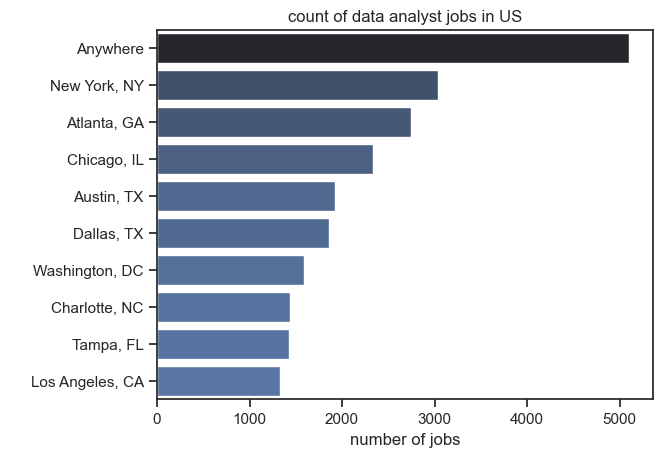

In [9]:
sns.set_theme(style='ticks')
sns.barplot(data=Location_plot , x='count' , y='job_location' , hue= 'count' , palette='dark:b_r', legend= False ) 

plt.title('count of data analyst jobs in US')
plt.xlabel('number of jobs')
plt.ylabel(" ")
plt.show()

work from home jobs , if the job required dgree and dose it provide health insurance 

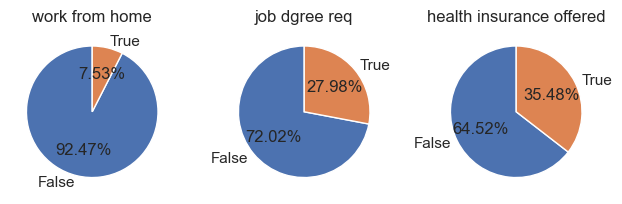

In [10]:
fig, ax = plt.subplots(1 , 3)

dic_coulmns = {'job_work_from_home' : 'work from home' ,
                'job_no_degree_mention' : 'job dgree req' ,
                'job_health_insurance' : 'health insurance offered'
                }



for i , (key , value ) in enumerate(dic_coulmns.items()) : 
    ax[i].pie(df_US[key].value_counts() , startangle= 90 , autopct = '%1.2f%%' , labels= ['False' , 'True'] )
    ax[i].set_title(value)


plt.tight_layout()

companies with most data analyst jobs

In [11]:
companies_plot = df['company_name'].value_counts().head(10).to_frame()

In [12]:
companies_plot

,count
company_name,
Emprego,6664
Booz Allen Hamilton,2879
Dice,2827
Harnham,2547
Insight Global,2254
Citi,2164
Confidenziale,2040
Listopro,1984
Capital One,1946


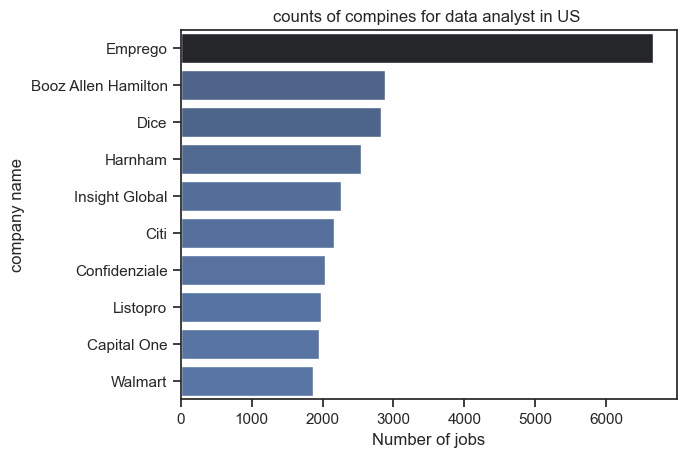

In [13]:
sns.barplot(data= companies_plot , x='count' , y='company_name' , hue='count' , palette='dark:b_r' , legend= False)
plt.title('counts of compines for data analyst in US ')
plt.ylabel('company name')
plt.xlabel("Number of jobs")
plt.show()